# Polynomial Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## Training the Linear Regression model on the whole dataset

In [3]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Training the Polynomial Regression model on the whole dataset

We'll try to fit the training set into a polynomila linear model with the equation:<br>
<br>
**y = b<sub>0</sub> + b<sub>1</sub>x<sub>1</sub><sup>1</sup> + b<sub>2</sub>x<sub>1</sub><sup>2</sup> + b<sub>3</sub>x<sub>1</sub><sup>3</sup> + b<sub>4</sub>x<sub>1</sub><sup>4</sup> ** 

In [4]:
# Generating the polynomial terms like x squared
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
#Generating linear model out of the polynomial terms
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Visualising the Linear Regression results

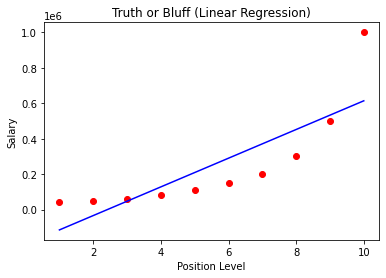

In [5]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

Clearly, this model is not a good fit for out dataset.

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

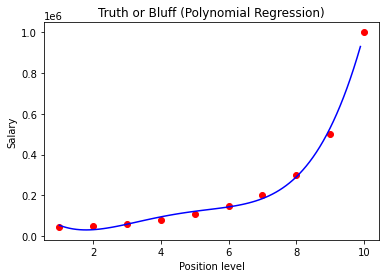

In [6]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Getting the final equation with the values of the coefficients

In [8]:
print(lin_reg_2.coef_) #Prints the coefficient of the independent variables. 
print(lin_reg_2.intercept_) #Prints the intercept of the curve on y-axis,i.e., the constant in the equation.

[      0.         -211002.33100292   94765.44289063  -15463.28671331
     890.15151515]
184166.66666719737


Therefore, the equation of our polynomial linear regression model is:<br>
**y = 184166.66666719737 + (-211002.33100292 x X<sub>1</sub><sup>1</sup>) + ( 94765.44289063 x X<sub>1</sub><sup>2</sup>) + (-15463.28671331 x X<sub>1</sub><sup>3</sup>) + (890.15151515 x X<sub>1</sub><sup>4</sup>) **
